#### 分类树

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split
import pandas as pd 

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
 X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3)

In [8]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  ,random_state = 30
                                  ,splitter = "random"
                                  ,max_depth = 3
                                  #,min_samples_leaf = 3
                                  #,min_samples_split = 3
                                 )
clf = clf.fit( X_train,y_train)
score = clf.score(X_test,y_test)


score

0.9629629629629629

In [10]:
feature_name = ['酒精','苹果酸','灰','会的碱性','镁','总酚','类黄酮','非黄类酚类','花青素','颜色强度','色调','稀释','脯 氨 酸']
import graphviz
dot_data= tree.export_graphviz(clf
                              ,feature_names=feature_name
                              ,class_names = ["1","2","3"]
                              ,filled = True
                              ,rounded = True)
graph = graphviz.Source(dot_data)

In [ ]:
graph

In [16]:
clf.feature_importances_

array([0.13856476, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45202446, 0.        , 0.        , 0.        ,
       0.08559709, 0.15792176, 0.16589193])

In [189]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.2738581709626589),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('会的碱性', 0.0),
 ('镁', 0.02612516855329239),
 ('总酚', 0.0),
 ('类黄酮', 0.45157809178088876),
 ('非黄类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.0),
 ('色调', 0.0),
 ('稀释', 0.04455648287837711),
 ('脯 氨 酸', 0.20388208582478273)]

###### 剪枝参数：
###### maxdepth：限制数据深度 
###### min_samples_leaf&min_samples_split：限制叶子至少包含最少的训练样本
###### max_features&min_impurity_decrease： 一般max_depth用做数的精修，min_impurity_decrease用来限制信息增益的大小


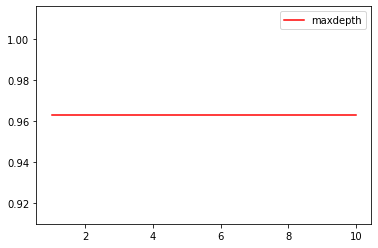

In [33]:
import matplotlib.pyplot as plt 
test=[]
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  ,random_state = 30
                                  ,splitter = "random"
                                  ,max_depth = 3
                                  #,min_samples_leaf = 3
                                  #,min_samples_split = 3
                                 )
    clf = clf.fit( X_train,y_train)
    score = clf.score(X_test,y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="maxdepth")
plt.legend()
plt.show()


 
    


In [35]:
clf.apply(X_test)

array([12, 12, 12,  4,  9,  4, 12, 12, 12,  7,  9, 12, 12, 12,  6, 12, 12,
        7,  7,  7, 12, 12, 12, 12,  4,  7, 12, 11, 12,  7, 12, 12,  4, 12,
        9, 12,  9, 11, 12,  9, 12,  9,  4,  9, 12,  7,  7,  4, 12,  9,  7,
        7,  9,  7], dtype=int64)

In [37]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 2, 2, 1, 0, 1, 2, 2, 1, 2])

## 回归树

In [38]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
import pandas as pd 

In [41]:
boston = load_boston()
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [43]:
regressor = DecisionTreeRegressor(random_state = 0)
cross_val_score(regressor,boston.data,boston.target,cv = 10,scoring="neg_mean_squared_error")

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])